# Introduction 

This project shows: 
- ability of writing solid,structured Python code 
- ability of using existing utilities(libraries) for processing and analyzing data.
- analytical and data pre-processing skills
- data visualization
- linear algebra application
- creating custom Linear Regression model

Project involves:
1. Theory part: matrices, matrix multiplication
2. Building a data encryption algorithm
3. Building Linear Regression model

Project of the training course "[Specialist in Data Science](https://practicum.yandex.com/data-scientist)" by [Yandex Practicum](https://practicum.yandex.com/).

# Setting up the project

In [1]:
%%html
<style>
table {float:left}
</style>

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import random
from scipy import stats as st
import warnings
# Reading files
import os 
from pathlib import Path
import urllib
# Machine Learning models (Regression models)
from sklearn.linear_model import LinearRegression
# Regression metrics - model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
# splitting data
from sklearn.model_selection import train_test_split, cross_val_score

## Setting up matplotlib

In [3]:
%matplotlib inline
small, medium, large = 14, 16, 22
params = {'figure.figsize':   (14, 5),
          'figure.titlesize': medium,
          'legend.fontsize':  small,
          'axes.titlesize':   small,
          'axes.labelsize':   small,
          'xtick.labelsize':  small,
          'ytick.labelsize':  small,
          'legend.loc':       'best'}
plt.rcParams.update(params)

In [4]:
# increasing the resolution
%config InlineBackend.figure_format = 'retina'

In [5]:
# disable warnigns
warnings.filterwarnings('ignore')

In [6]:
# removing exponential notation
pd.options.display.float_format = '{:.3f}'.format

In [7]:
# display all columns
pd.set_option('display.max_columns', None)

# Linear Algebra

# Project "Personal data encryption"

## Project description
The insurance company needs to protect user data. We need to encrypt personal information
## Data description
Data from insurance company. Each object represents the user information: gender, age, salary, family members for the last 5 years.

|Column          | Column type |
 |:---------------|:-----------|
 |Gender| feature |
 |Age| feature |
 |Salary| feature |
 |Family members| feature |
 |Insurance benefits | target |

## Objective
We need to create [data encryption algorithm](https://en.wikipedia.org/wiki/Encryption) so that after transformation, the accuracy of Machine Learning models will not change as without transformation

## Work plan

1. [Overview of data](#review)
2. [Data preprocessing](#dataPreprocessing)
    - [Column processing](#columnProcessing)
    - [Data check](#dataCheck)
3. [Theory proof](#theoryProof)
4. [Data encryption algorithm](#dataEncryptAlgorithm)
    - [Model creation](#modelCreation)
5. [Algorithm application](#algorithmApplication)
    - [Data separation](#dataSeparation)
    - [Original algorithm application](#originalAlgorithmApplication)
        - [Model from sklearn](#originalAlgoSklearnModel)
        - [Custom model](#originalAlgoCustomModel)
    - [Suggested algorithm application](#suggestedAlgorithmApplication)
        - [Model from sklearn](#suggestedAlgoSklearnModel)
        - [Custom model](#suggestedAlgoCustomModel)
6. [Results](#results)

<br>

<a id="review"></a>
# Stage 1 - Overview of data

Reading the data and saving it in appropriate variable.

In [8]:
Path('datasets').mkdir(parents=True, exist_ok=True)

def get_file(file_name, url):
    # Check if there is a file
    if not os.path.exists(file_name):
        print(file_name,'cannot find file, file will be downloaded from URL link')
        # download the file from the url link, put it in the path file_name
        # load data using the urllib library
        _ = urllib.request.urlretrieve(url, file_name)

# Dictionary with the file name and a URL link to it
urls = {
    'insurance': ('datasets/insurance.csv', '_____________'),
}
[get_file(*urls[k]) for k in urls]
[get_file(urls[k][0], urls[k][1]) for k in urls]

raw_insurance_data = pd.read_csv(urls['insurance'][0],sep=',')

Напишем функцию для вывод общей информации

In [9]:
def displayGeneralDataInfo(data):
    """
    Function to display general information
    data
    """
    print("Displaying 5 rows of data")
    print()
    # displaying 5 rows of data
    display(data.head())
    print("Display general information ")
    print()
    # displaying general info
    display(data.info())
    print("Data distribution")
    print()
    # displaying data distribution
    display(data.describe().T)
    print("Data correlations")
    print()
    # displaying data correlations
    display(data.corr())
    print()

In [10]:
displayGeneralDataInfo(raw_insurance_data)

Displaying 5 rows of data



,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.000,49600.000,1,0
1,0,46.000,38000.000,1,1
2,0,29.000,21000.000,0,0
3,0,21.000,41700.000,2,0
4,1,28.000,26100.000,0,0


Display general information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Gender                5000 non-null int64
Age                   5000 non-null float64
Salary                5000 non-null float64
Family members        5000 non-null int64
Insurance benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Data distribution



,count,mean,std,min,25%,50%,75%,max
Gender,5000.000,0.499,0.500,0.000,0.000,0.000,1.000,1.000
Age,5000.000,30.953,8.441,18.000,24.000,30.000,37.000,65.000
Salary,5000.000,39916.360,9900.084,5300.000,33300.000,40200.000,46600.000,79000.000
Family members,5000.000,1.194,1.091,0.000,0.000,1.000,2.000,6.000
Insurance benefits,5000.000,0.148,0.463,0.000,0.000,0.000,0.000,5.000


Data correlations



,Gender,Age,Salary,Family members,Insurance benefits
Gender,1.000,0.002,0.015,-0.009,0.010
Age,0.002,1.000,-0.019,-0.007,0.651
Salary,0.015,-0.019,1.000,-0.030,-0.015
Family members,-0.009,-0.007,-0.030,1.000,-0.036
Insurance benefits,0.010,0.651,-0.015,-0.036,1.000


Comments: 
1. 5000 objects in dataframe
2. There are no missing data nor negative values
4. Columns are written with capital letter. We need to convert column names to lowercase.

Let's look at the data distribution. Firstly, we will write a function to plot distribution graph.

In [11]:
def dataDistribution(df,column,title,x_label, y_label):
    """
    Distribution graph drawing function
    df - dataframe
    column 
    title
    x_label - label for x axis
    y_label - label for y axis
    """
    sns.kdeplot(data=df[column], label=column, shade=True)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

### Age

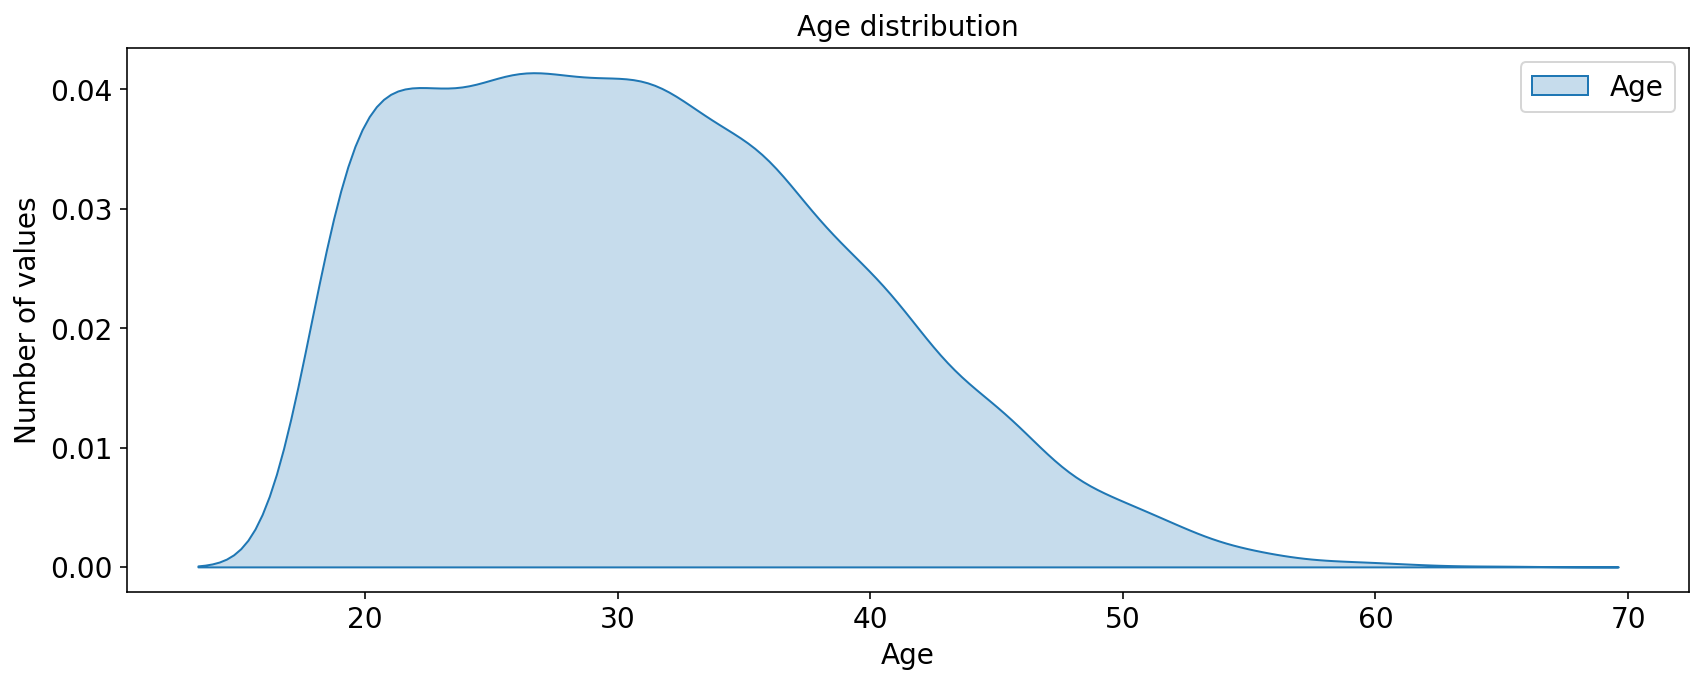

In [12]:
dataDistribution(raw_insurance_data, 'Age', "Age distribution", "Age", "Number of values")

Most of the values are in 20 to 35-40 years old range.

## Salary

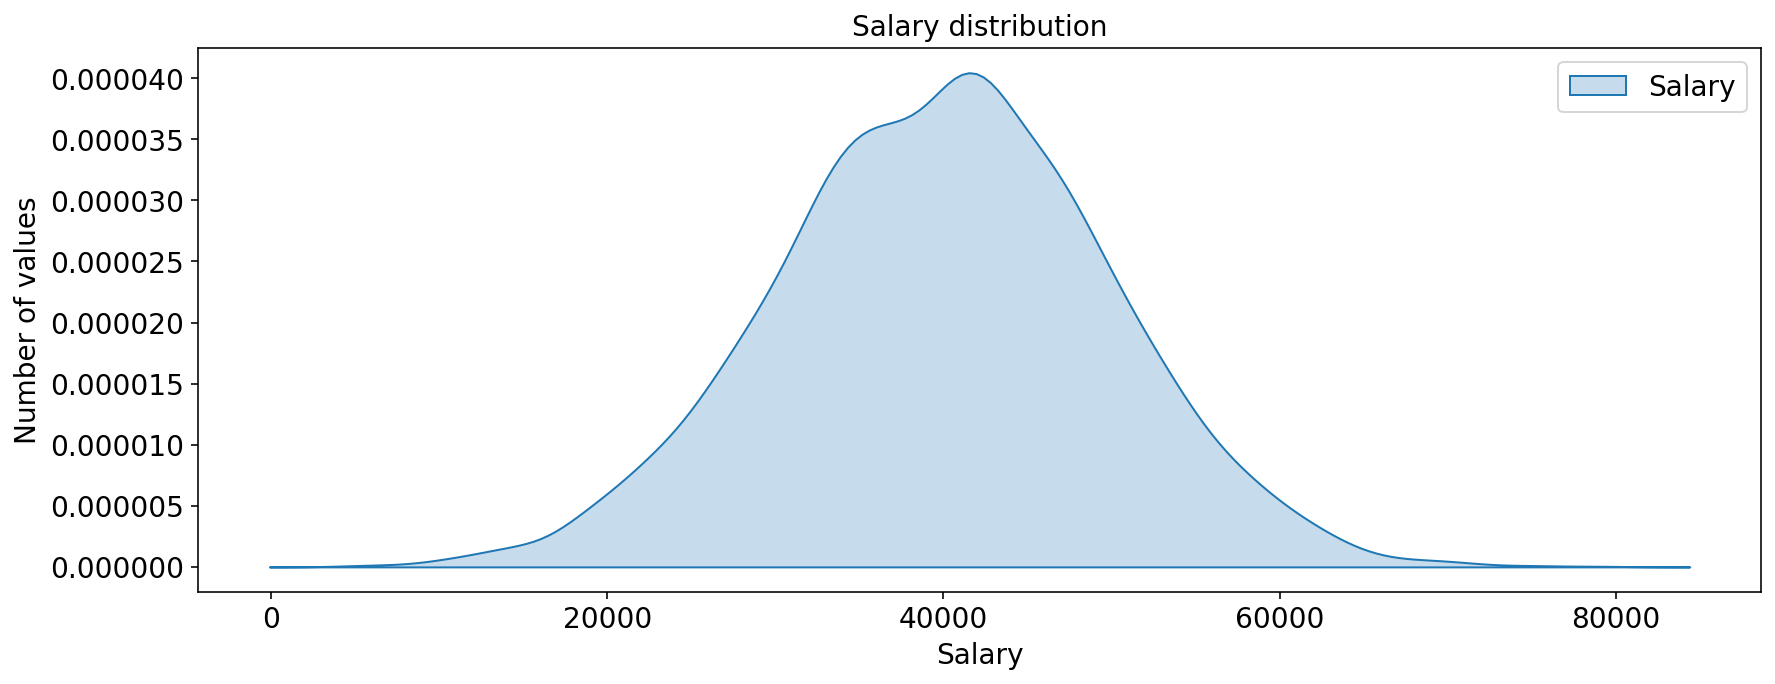

In [13]:
dataDistribution(raw_insurance_data, 'Salary', "Salary distribution", "Salary", "Number of values")

We see normal distribution. In average, client has 40000 dollars. Most of the values are in 25000 to 55000 dollars range.

## Family members

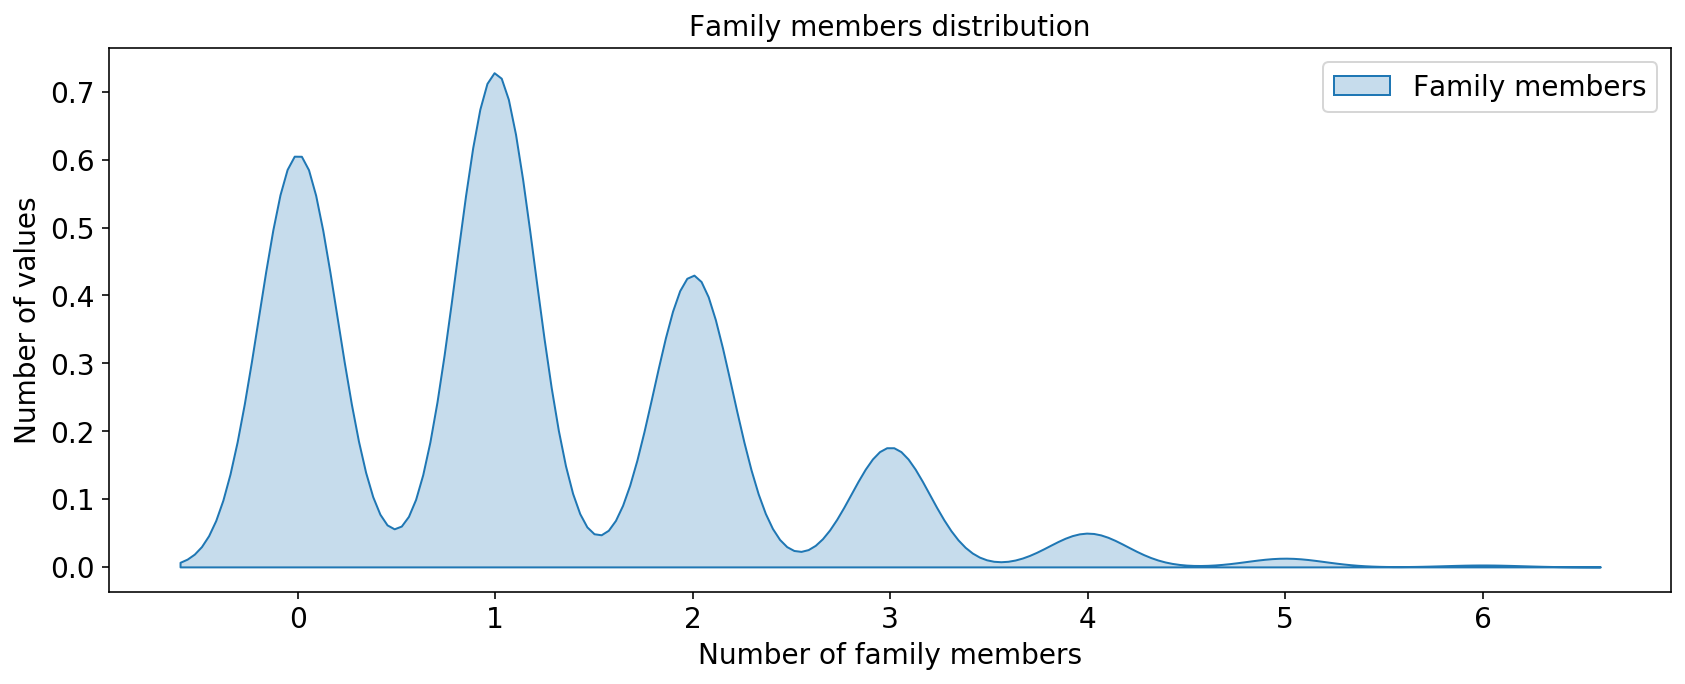

In [14]:
dataDistribution(raw_insurance_data, 'Family members', "Family members distribution", "Number of family members", "Number of values")

Most of the clients do not have a family, or have a family without children.

## Insurance benefits

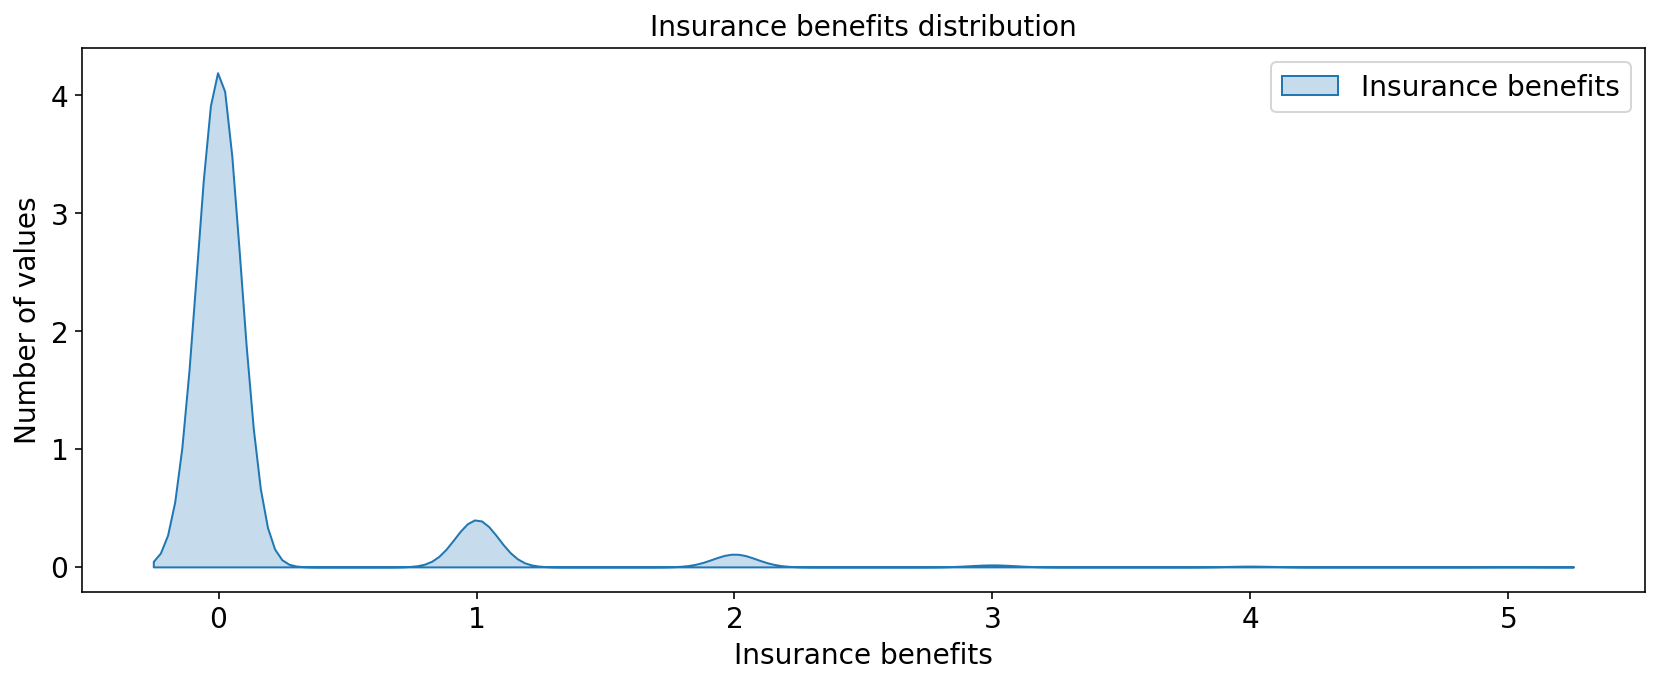

In [15]:
dataDistribution(raw_insurance_data, 'Insurance benefits', "Insurance benefits distribution", "Insurance benefits", "Number of values")

Most of the clients don't have insurance benefits

## Summary

1. 5000 objects in dataframe
2. There are no missing data nor negative values
4. Columns are written with capital letter. We need to convert column names to lowercase.
5. Distributions:
    - Age: Most of the values are in 20 to 35-40 years old range.
    - Salary: We see normal distribution. In average, client has 40000 dollars. Most of the values are in 25000 to 55000 dollars range.
    - Family members: Most of the clients do not have a family, or have a family without children. 
    - Insurance benefits:  don't have insurance benefits
    
We need to: 
1. Preprocess data:
    - Convert column names to lower case
    - Change data types
    - Check data for missing values, duplicate values.
2. Theory: Will the accuracy of Linear regression model change, if we multiply feature matrix by invertable matrix? 
3. Suggest a data transforming algorithm
4. Apply suggested algorithm and see R2 metric values.

<br>

<a id="dataPreprocessing"></a>
# Stage 2 - Data preprocessing

At this stage, we need to: 
1. Convert column names to lower case
2. Change data types
3. Check data for missing values, duplicate values.

<a id="columnProcessing"></a>
## Column processing

Let's convert column names to lower case. 

In [16]:
def snake_case(s):
    """
    Transforming string with camelCase into snake_case.
    s - string value (column name)
    """
    return ''.join('_' + c.lower()
                   if all([i != 0,
                           c.isupper(),
                           s[i - 1].islower()])
                   else c.lower()
                   for i, c in enumerate(s))

In [17]:
# transform into snake_case
raw_insurance_data.columns = map(snake_case, raw_insurance_data.columns)
raw_insurance_data.columns

Index(['gender', 'age', 'salary', 'family members', 'insurance benefits'], dtype='object')

Column names are converted, let's move on to data check

<a id="dataCheck"></a>
## Data check

Write a function which:
1. Check for missing data
2. Check for duplicate values
3. Check for negative values
4. Check appropriate types: float64, int64

In [18]:
def get_preprocessed_data(raw_data):
    """
    Function checks dataframe. Returns preprocessed data for model training 
    raw_data - data to check
    """
    # check data
    assert raw_data.isna().sum().sum() == 0, 'There should not be missing data!'
    assert raw_data.select_dtypes(exclude=[np.float64, np.int64]).size == 0, 'Type of data needs to be one of the following: float64, int64!'
    assert raw_data.duplicated().sum().sum() == 0, 'There should not be duplicate values'
    print('Data is valid!')
    preprocessed_data = raw_data.copy()
    
    try:
        preprocessed_data['age'] = preprocessed_data['age'].astype('int')
    except:
        print('Check for missing values. Data type - NaN can not be converted to int')
    
    return preprocessed_data

In [19]:
# insurance_data = get_preprocessed_data(raw_insurance_data)
# there are duplicate values

Look at the duplicates

In [20]:
raw_insurance_data.duplicated().sum()

153

153 duplicate values. Let's remove them by using *drop_duplicates()*.

In [21]:
raw_insurance_data = raw_insurance_data.drop_duplicates().reset_index(drop=True)

In [22]:
insurance_data = get_preprocessed_data(raw_insurance_data)

Data is valid!


Let's how many objects we have

In [23]:
print(f'Number of objects after preprocessing: {insurance_data.shape[0]}')

Number of objects after preprocessing: 4847


## Summary

At the preprocessing stage, we:
1. Converted column names into lowercase
2. Check data for missing data, duplicate values. We found out that there were 153 duplicate values. We have removed them. Data is valid!
3. Number of objects after preprocessing: 4847

<br>

<a id="theoryProof"></a>
# Stage 3 - Theory proof

At this stage it is necessary to check: if we multiply the feature matrix by the invertible matrix, will the quality of the linear regression change? 

### Properties of matrix and matrix multiplication

- Associative property of multiplication - $A(BC) = (AB)C$
- Distributive properties  - $A(B+C)=AB+AC$ , $(B+C)A=BA+CA$
- Multiplicative identity property  - $IA = A$ and  $AI = A$
- Transposed inverse matrix is the transposed  inverse matrix  - $(P^T)^{-1} = (P^{-1})^T$
- Transposed product of matrices is equal to the product of transposed matrices  - $(AB)^T = B^T A^T$
- The inverse of the product of two matrices is equal to the inverse of matrix B(second) to the inverse of matrix A(first) - $(AB)^{-1} = B^{-1} A^{-1}$
- Multiplication of a matrix by its inverse is an identity matrix - $P P^{-1} = E$ 

### Solution

For linear regression we need to find the model parameters, at which the value of the loss function on the training sample is minimal. The formula of the linear regression training problem for the loss function: 

\begin{equation} w=argminMSE(Xw, y) \end{equation}

The minimum *MSE* value is obtained when the weights are equal to this value:  

\begin{equation} w=(X^{T}*X)^{-1}*X^{T}*y \end{equation}

- The transposed feature matrix is multiplied by itself. 
- The inverse matrix to the result is calculated.
- The resulting inverse matrix is multiplied by the transposed feature matrix.
- The result is multiplied by the vector of target values

A matrix **A** with power *-1* is called **inverse** to a square matrix **A** if the equations are satisfied:

\begin{equation} AA^{-1} = A^{-1}A = E \end{equation}

Square matrices for which the inverse can be found are called *invertible*. Non-invertible matrices are rare.

If you generate a random matrix with *np.random().normal()*. The probability of getting an irreversible matrix is close to 0. Example:

In [24]:
# Generate a random square matrix
matrix_example = np.random.normal(size=(3,3))
matrix_example

array([[-1.41433294, -0.53442887,  0.3766004 ],
       [-0.71244683, -0.43384293, -0.23506484],
       [-1.08268154, -0.4559081 ,  0.76780223]])

In [25]:
# Find the inverse matrix
matrix_example_invert = np.linalg.inv(matrix_example)
matrix_example_invert

array([[-3.15003176,  1.70740489,  2.06779039],
       [ 5.73463754, -4.8522541 , -4.29832187],
       [-1.03674291, -0.4735675 ,  1.66594817]])

Check:

\begin{equation} AA^{-1} = A^{-1}A = E \end{equation}

In [26]:
identity_matrix = np.dot(matrix_example, matrix_example_invert)
identity_matrix

array([[ 1.00000000e+00, -1.91630604e-16, -1.82262799e-16],
       [ 6.80761446e-16,  1.00000000e+00, -7.22040534e-17],
       [ 1.01331998e-15, -1.97219618e-16,  1.00000000e+00]])

Let the variable ***P*** be our invertible matrix. We need to prove: 

\begin{equation} MSE(X*w, y) = MSE(X*P*w_1, y) \end{equation}

**w** left side of equality:

\begin{equation} w=(X^{T}*X)^{-1}*X^{T}*y \end{equation}

**w1** right side of equality: 

\begin{equation} w_1=((X*P)^{T}*(X*P))^{-1}(X*P)^{T}*y \end{equation}

Expand the brackets **w1**, under the conditions:
1. **X** and **P** must be quadratic
2. $(XP)^T=P^TX^T$ The transpose product of matrices equals the product of transpose matrices
3. $(XP)^{-1}=P^{-1}X^{-1}$ The inverse matrix from the product of two matrices is equal to the inverse of matrix P(second) to the inverse of matrix X(first)

\begin{equation} w_1=((P^T*X^T) * (X * P))^{-1} * P^T*X^T * y \end{equation}

\begin{equation} w_1=(X * P)^{-1} * (P^T*X^T)^{-1} * P^T*X^T * y \end{equation}

\begin{equation} w_1= P^{-1} * X^{-1} * (X^T)^{-1} * (P^T)^{-1} * P^T*X^T * y \end{equation}

By the property: $(XP)^{-1}=P^{-1}X^{-1}$ the inverse matrix from the product of two matrices is equal to the inverse of matrix B(second) to the inverse of matrix A(first), let us do the transformation:

\begin{equation} w_1= P^{-1}  * (X^T*X)^{-1} * (P^T)^{-1} * P^T*X^T * y \end{equation}

Rearrange the multipliers

\begin{equation} w_1= (X^T*X)^{-1} * X^T * y * P^{-1} * (P^T)^{-1} * P^T \end{equation}

We know that:

\begin{equation} w=(X^{T}*X)^{-1}*X^{T}*y \end{equation}

Let's substitute this into our equation and get this result:

\begin{equation} w_1= (X^T*X)^{-1} * X^T * y * P^{-1} * (P^T)^{-1} * P^T \end{equation}

\begin{equation} w_1= w * P^{-1} * (P^T)^{-1} * P^T  \end{equation}

Based on:

- Multiplication of a matrix by its inverse is an identity matrix - $P P^{-1} = E$ 

- Transposed inverse matrix is the transposed  inverse matrix  - $(P^T)^{-1} = (P^{-1})^T$

- Transposed product of matrices is equal to the product of transposed matrices  - $(AB)^T = B^T A^T$


Transform our equation

\begin{equation} w_1= w*(P^{T})^{-1}*P^{T}*P^{-1} \end{equation}
\begin{equation} w_1= w*(P^{-1})^{T}*P^{T}*P^{-1} \end{equation}
\begin{equation} w_1= w*(P*P^{-1})^{T}*P^{-1} \end{equation}
\begin{equation} w_1= w*(E)^{T}*P^{-1} \end{equation}

$E^T = E$ The result of transposing the identity matrix E is the identity matrix E. 

$AE = EA = A$ If any matrix A is multiplied by a identity matrix (or vice versa), we get the same matrix A

\begin{equation} w_1= w*P^{-1} \end{equation}

Substitute in our first equality

\begin{equation} MSE(X*w, y) = MSE(X*P*w*P^{-1}, y) \end{equation}

Rearrange the multipliers

\begin{equation} MSE(X*w, y) = MSE(X*P*P^{-1}*w, y) \end{equation}

Also, based on:

$PP^{-1} = P^{-1}P = E$ multiplying a matrix by its inverse is a identity matrix.

$AE = EA = A$ If any matrix A is multiplied by a identity matrix (or vice versa), we get the same matrix A

Transform the equation

\begin{equation} MSE(X*w, y) = MSE(X*E*w, y) \end{equation}

\begin{equation} MSE(X*w, y) = MSE(X*w, y) \end{equation}

We proved that by multiplying the feature matrix by the invertible matrix, the quality of the model will not change.

## Summary

At this stage, we checked: if we multiply the feature matrix by the invertible matrix, will the quality of the linear regression change? 

We proved that **by multiplying the feature matrix by the invertible matrix, the quality of the model will not change**.

<br>

<a id="dataEncryptAlgorithm"></a>
# Stage 4 - Data encryption algorithm

At this stage we need to create a data encryption algorithm.

We found out earlier that **the quality of the model will not change by multiplying the feature matrix by a invertible matrix**.

Thus, we will suggest applying [Symmetric-key algorithm](https://en.wikipedia.org/wiki/Symmetric-key_algorithm):
1. Generate a key (our invertible matrix)
2. Multiply the feature matrix by the obtained key (invertible matrix)
3. Create a linear regression model
4. Train the model on the resulting matrix
5. Make a prediction
6. Check the metric *r2_score()* and the resulting w vector of weights + w0 prediction shift

For comparison, let us suggest the original algorithm without multiplication by a invertible matrix: 
1. Create a linear regression model
2. Train the model without changing the feature matrix
3. Make predictions
4. Check *r2_score()* metric and w vector weights + w0 prediction shift

<a id="modelCreation"></a>
## Model creation

Let's create our Linear Regression model and compare it with the model from the *sklearn* library.

In [27]:
class LinearRegressionCustom:
    def fit(self, train_features, train_target):
        """
        Model training method
        self - class object
        train_features - feature matrix
        train_target - vector target
        """
        # add a column consisting only of 1s
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features),axis=1)
        y = train_target
        # loss function
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        # save the values of w - vector of weights
        self.w = w[1:]
        # prediction shift
        self.w0 = w[0]
    
    def predict(self, features):
        """
        Model prediction method. The method returns a vector of predictions
        self -  class object
        features - feature matrix
        """
        return features.dot(self.w) + self.w0

## Summary

Based on the conclusion that **the quality of the model will not change by multiplying the feature matrix by a invertable matrix of equal size**, we proposed a data transformation (encryption) algorithm. In addition, we created our custom Linear Regression model. 

<br>

<a id="algorithmApplication"></a>
# Stage 5 - Algorithm application

At this stage, we need to apply the proposed algorithm and see if the quality of the model changes from the transformations or not. In addition, let's compare our custom model with the model from the *sklearn* library.

Let's also write a function for displaying model R2 metric score

In [28]:
def drawPlot(df,x_axis, y_axis, x_label, y_label,plot_title):
    """
    Function for plotting graphs 
    df - dataframe
    x_axis
    y_axis
    x_label - label for x axis
    y_label - label for y axis
    plot_title - title
    """
    plt.title(plot_title)
    sns.barplot(x=x_axis,y=y_axis, data=df)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

<a id="dataSeparation"></a>
## Data separation

First, let's write a function for target and features separation.

In [29]:
def target_features_split(data,column):
    """
    Function separates target and features. It returns 1) target, 2) features
    data - data that needs to be splitted 
    column - target 
    """
    return data[column], data.drop(column,axis=1)

In [30]:
train_target,train_features = target_features_split(insurance_data, 'insurance benefits')

<a id="originalAlgorithmApplication"></a>
## Original algorithm application

<a id="originalAlgoSklearnModel"></a>
### Model from sklearn

In [31]:
# create a model
model_1 = LinearRegression()
# train 
model_1.fit(train_features, train_target)
# predictions
model_1_pred = model_1.predict(train_features)
model_1_r2_score = r2_score(train_target,model_1_pred)
print(f'r2_score: {model_1_r2_score}')
print(f'Vector weights w: {model_1.coef_}')
print(f'Shift w0 {model_1.intercept_}')

r2_score: 0.4302010044852067
Vector weights w: [ 9.46018141e-03  3.61640081e-02 -1.38991363e-07 -1.42517371e-02]
Shift w0 -0.9517099946522036


<a id="originalAlgoCustomModel"></a>
### Custom model

In [32]:
# create a model
model_2 = LinearRegressionCustom()
# train 
model_2.fit(train_features, train_target)
# predictions
model_2_pred = model_2.predict(train_features)
model_2_r2_score = r2_score(train_target,model_2_pred)
print(f'r2_score: {model_2_r2_score}')
print(f'Vector weights w: {model_2.w}')
print(f'Shift w0 {model_2.w0}')

r2_score: 0.4302010044852068
Vector weights w: [ 9.46018141e-03  3.61640081e-02 -1.38991363e-07 -1.42517371e-02]
Shift w0 -0.95170999465196


Create a dataframe(table) to display the results

In [33]:
sklearn_vs_custom = pd.DataFrame({"model":['sklearn','custom'], "r2_score": [model_1_r2_score,model_2_r2_score]})
sklearn_vs_custom

,model,r2_score
0,sklearn,0.430
1,custom,0.430


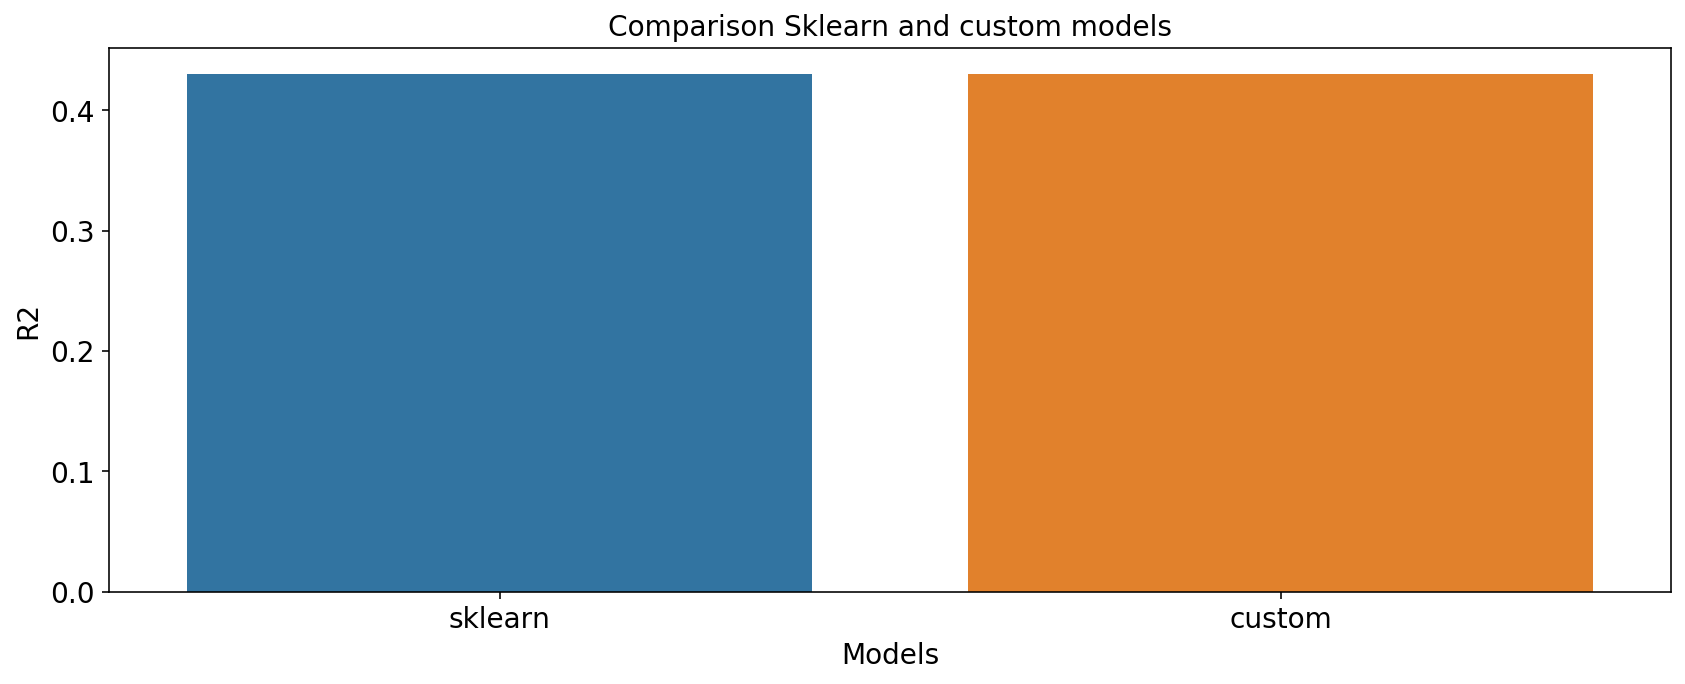

In [34]:
drawPlot(sklearn_vs_custom,'model','r2_score', 'Models', 'R2','Comparison Sklearn and custom models')

Our model works the same way as the model from the *sklearn* library!

<a id="suggestedAlgorithmApplication"></a>
## Suggested algorithm application

Let's generate a random matrix with the *np.random().normal()* function. The probability of getting an irreversible matrix is close to 0.

In [35]:
# Generate a random square matrix
size = train_features.shape[1]
key = np.random.normal(size=(size,size))
# Multiply the feature matrix by the generated matrix
train_features_encrypted = train_features.dot(key)

Verifying encrypted data

In [36]:
train_features_encrypted.head()

,0,1,2,3
0,151.110,3987.757,36029.110,22984.116
1,111.706,3056.100,27618.971,17617.797
2,60.743,1689.655,15268.161,9739.025
3,130.985,3350.392,30271.897,19313.344
4,77.620,2099.443,18967.841,12099.217


Let's look at the data before and after encryption and try to recover the encrypted data with the key.

**Before encryption**

In [37]:
train_features.head()

,gender,age,salary,family members
0,1,41,49600.000,1
1,0,46,38000.000,1
2,0,29,21000.000,0
3,0,21,41700.000,2
4,1,28,26100.000,0


**After encryption**

In [38]:
train_features_encrypted.head()

,0,1,2,3
0,151.110,3987.757,36029.110,22984.116
1,111.706,3056.100,27618.971,17617.797
2,60.743,1689.655,15268.161,9739.025
3,130.985,3350.392,30271.897,19313.344
4,77.620,2099.443,18967.841,12099.217


To decrypt the features, multiply by the inverse of the key matrix

In [39]:
# find the inverse matrix
key_inv = np.linalg.inv(key)
# multiply the matrix of encrypted features by the inverse matrix of the key
train_features_decrypted = train_features_encrypted.dot(key_inv)
train_features_decrypted.head()

,0,1,2,3
0,1.000,41.000,49600.000,1.000
1,-0.000,46.000,38000.000,1.000
2,0.000,29.000,21000.000,0.000
3,0.000,21.000,41700.000,2.000
4,1.000,28.000,26100.000,0.000


As you can see, the data has been restored. Let's move on to the application

<a id="suggestedAlgoSklearnModel"></a>
### Model from sklearn

In [40]:
# create a model
model_3 = LinearRegression()
# train
model_3.fit(train_features_encrypted, train_target)
# predictions
model_3_pred = model_3.predict(train_features_encrypted)
model_3_r2_score = r2_score(train_target,model_3_pred)
print(f'r2_score: {model_3_r2_score}')
print(f'Vector weights w: {model_3.coef_}')
print(f'Shift w0 {model_3.intercept_}')

r2_score: 0.4302010044852066
Vector weights w: [-0.13882131  0.02999755 -0.01978046  0.02677928]
Shift w0 -0.9517099946514704


<a id="suggestedAlgoCustomModel"></a>
### Custom model

In [41]:
# create a model 
model_4 = LinearRegressionCustom()
# train
model_4.fit(train_features_encrypted, train_target)
# predictions
model_4_pred = model_4.predict(train_features_encrypted)
model_4_r2_score = r2_score(train_target,model_4_pred)
print(f'r2_score: {model_4_r2_score}')
print(f'Vector weights w: {model_4.w}')
print(f'Shift w0 {model_4.w0}')

r2_score: 0.4302010044852024
Vector weights w: [-0.13882131  0.02999755 -0.01978046  0.02677927]
Shift w0 -0.9517101478869723


<a id="summary"></a>
## Results

Let's write a function to display the model results

In [42]:
def results(model, r2_score, title, isCustom):
    """
    Function for displaying results
    model 
    r2_score - R2 metric accuracy
    title 
    isCustom - whether the model is custom or not
    """
    if (isCustom):
        print(title)
        print(f'r2_score: {r2_score}')
        print(f'Vector weights w: {model.w}')
        print(f'Shift w0: {model.w0}')
    else:
        print(title)
        print(f'r2_score:: {r2_score}')
        print(f'Vector weights  w: {model.coef_}')
        print(f'Shift w0: {model.intercept_}')

In [43]:
results(model_1, model_1_r2_score, "The sklearn model without data encryption", False)

The sklearn model without data encryption
r2_score:: 0.4302010044852067
Vector weights  w: [ 9.46018141e-03  3.61640081e-02 -1.38991363e-07 -1.42517371e-02]
Shift w0: -0.9517099946522036


In [44]:
results(model_2, model_2_r2_score, "Custom model without data encryption", True)

Custom model without data encryption
r2_score: 0.4302010044852068
Vector weights w: [ 9.46018141e-03  3.61640081e-02 -1.38991363e-07 -1.42517371e-02]
Shift w0: -0.95170999465196


In [45]:
results(model_3,model_3_r2_score, "The sklearn model with data encryption", False)

The sklearn model with data encryption
r2_score:: 0.4302010044852066
Vector weights  w: [-0.13882131  0.02999755 -0.01978046  0.02677928]
Shift w0: -0.9517099946514704


In [46]:
results(model_4, model_4_r2_score, "Custom model with data encryption", True)

Custom model with data encryption
r2_score: 0.4302010044852024
Vector weights w: [-0.13882131  0.02999755 -0.01978046  0.02677927]
Shift w0: -0.9517101478869723


Create a dataframe(table) to display the results

In [47]:
model_results = pd.DataFrame({"model":['Sklearn without encryption','Custom without encryption', 'Sklearn with encryption','Custom with encryption'], "r2_score": [model_1_r2_score,model_2_r2_score,model_3_r2_score,model_4_r2_score]})
model_results

,model,r2_score
0,Sklearn without encryption,0.430
1,Custom without encryption,0.430
2,Sklearn with encryption,0.430
3,Custom with encryption,0.430


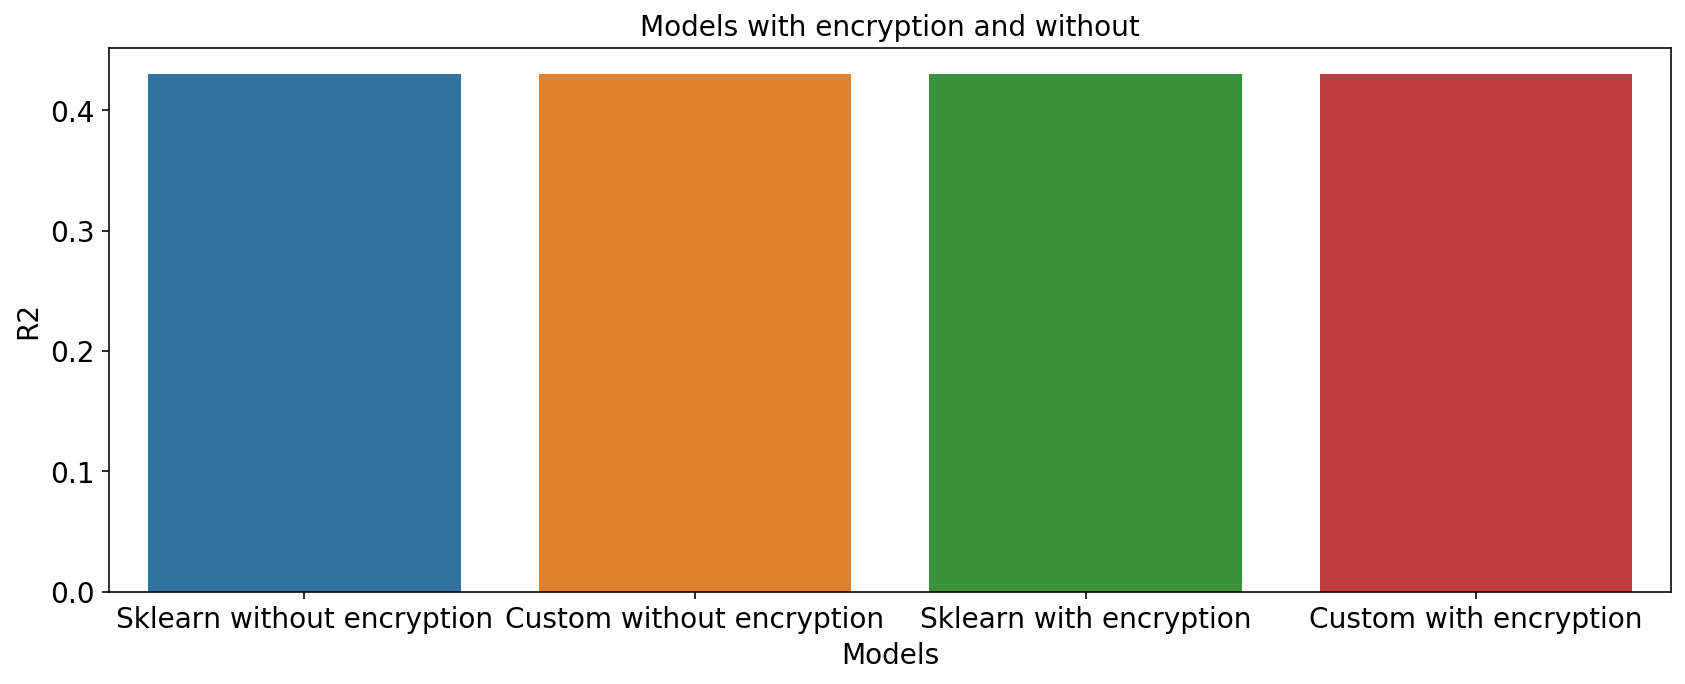

In [48]:
drawPlot(model_results,'model','r2_score', 'Models', 'R2','Models with encryption and without')

As we can see:
- The quality of the models has not changed, the r2 metric is almost the same.
- Vectors of weights are different.
- Our custom model works like the model from the sklearn library

## Summary

At this stage we: 
1. Applied the proposed algorithm:
    - Looked at the data before encryption and after. The data was encrypted.
    - We tried to recover the encrypted data using the key. The data was recovered.
2. Evaluated whether or not the transformation changed the quality of the models:
    - The quality of the models did not change, the r2 metric is almost the same.
    - The vectors of weights are different.
3. We compared our custom model with the sklearn library model:
    - Our custom model works like the model from the sklearn library.

<br>

<a id="results"></a>
# Stage 6 - Results

In the project, we successfully created a [data encryption algorithm](https://en.wikipedia.org/wiki/Encryption) so that after transformation, the accuracy of Machine Learning models will not change as without transformation. Thereby, we helped the insurance company to protect personal data information of customers.
1. At the preprocessing stage, we:
    - Converted column names into lowercase
    - Check data for missing data, duplicate values. We found out that there were 153 duplicate values. We have removed them. Data is valid!
    - Number of objects after preprocessing: 4847
2. We checked: if we multiply the feature matrix by the invertible matrix, will the quality of the linear regression change? 
    - Using the theory, we proved that **by multiplying the feature matrix by the invertible matrix, the quality of the model will not change**.
3. We proposed a data transformation (encryption) algorithm [Symmetric-key algorithm](https://en.wikipedia.org/wiki/Symmetric-key_algorithm):
    1. Generate a key (our invertible matrix)
    2. Multiply the feature matrix by the obtained key (invertible matrix)
    3. Create a linear regression model
    4. Train the model on the resulting matrix
    5. Make a prediction
    6. Check the metric *r2_score()* and the resulting w vector of weights + w0 prediction shift
4. Created custom Linear Regression model. 
5. Applied suggested algorithm and compared R2 metric values:
    1. Applied the proposed algorithm:
        - Looked at the data before encryption and after. The data was encrypted.
        - We tried to recover the encrypted data using the key. The data was recovered.
    2. Evaluated whether or not the transformation changed the quality of the models:
        - The quality of the models did not change, the r2 metric is almost the same.
        - The vectors of weights are different.
    3. We compared our custom model with the sklearn library model:
        - Our custom model works like the model from the sklearn library.
    
